In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [116]:
data = pd.read_csv("Dataset_II.csv")

In [117]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [118]:
#ids are not useful. so drop column 1
data.drop(data.columns[0], inplace=True, axis=1)

In [119]:
data.isnull().sum()
data.isna().sum()
#2 columns contain missing values

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [120]:
#taking the numeric values
cols = ["Age","Credit amount", "Duration"]
data = data.loc[:,cols]

In [121]:
data=np.log(data)

In [122]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data= pd.DataFrame(data_scaled, columns=data.columns)

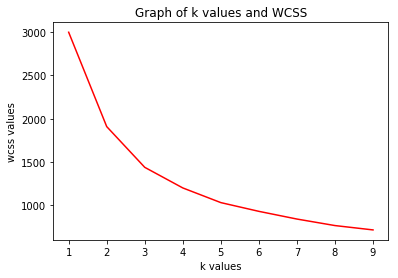

In [123]:
#elbow plot
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()
#optimal=3

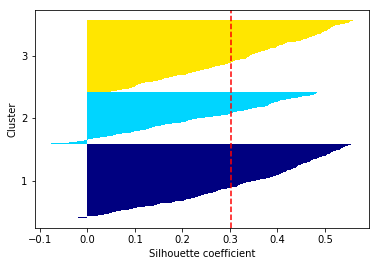

In [124]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0) 
y_km = km.fit_predict(data)
from matplotlib import cm 
from sklearn.metrics import silhouette_samples 
cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(data, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0 
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),  c_silhouette_vals, height=1.0, edgecolor='none', color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,  color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient') 
plt.show()

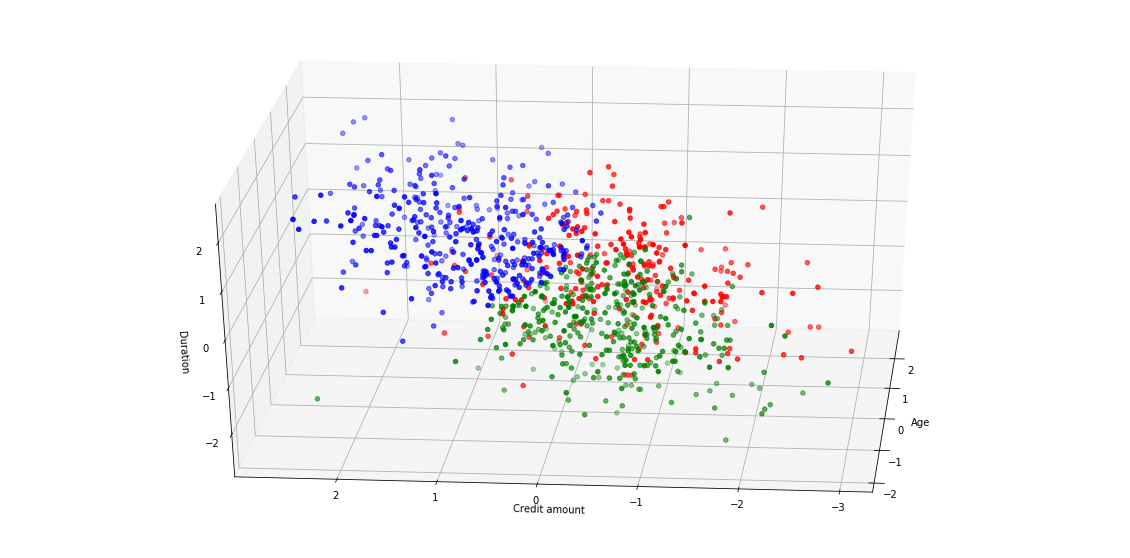

In [125]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
data['label']=y_km
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Age"][data.label == 0], data["Credit amount"][data.label == 0], data["Duration"][data.label == 0], c='blue')
ax.scatter(data["Age"][data.label == 1], data["Credit amount"][data.label == 1], data["Duration"][data.label == 1], c='red')
ax.scatter(data["Age"][data.label == 2], data["Credit amount"][data.label == 2], data["Duration"][data.label == 2], c='green')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Credit amount")
ax.set_zlabel('Duration')
plt.show()

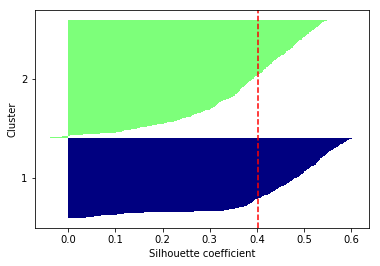

In [126]:
#taking number of clusters=2
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0) 
y_km = km.fit_predict(data)
from matplotlib import cm 
from sklearn.metrics import silhouette_samples 
cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(data, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0 
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),  c_silhouette_vals, height=1.0, edgecolor='none', color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,  color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient') 
plt.show()

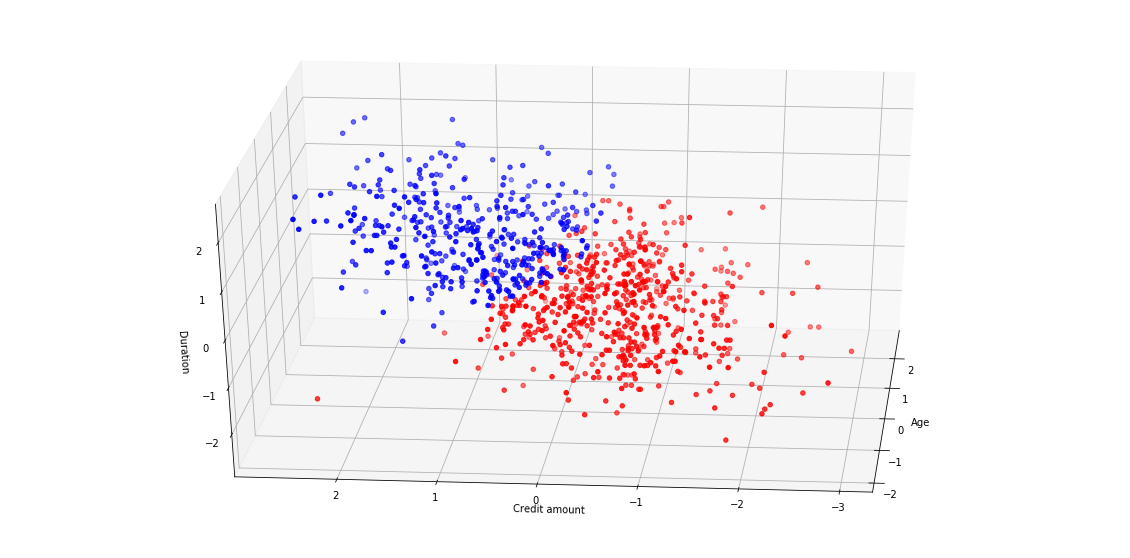

In [127]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
data['label']=y_km
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Age"][data.label == 0], data["Credit amount"][data.label == 0], data["Duration"][data.label == 0], c='blue')
ax.scatter(data["Age"][data.label == 1], data["Credit amount"][data.label == 1], data["Duration"][data.label == 1], c='red')



ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Credit amount")
ax.set_zlabel('Duration')
plt.show()